In [1]:
import numpy as np
import tensorflow as tf
from numpy.random import randn
from qibo import gates, hamiltonians, models, set_backend
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import colors
from scipy.stats import entropy

# 1D gamma distribution

## Loss function

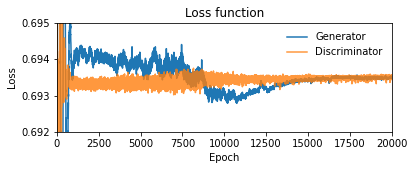

In [2]:
d_loss = np.loadtxt("dloss_1Dgamma_1_3_2_10000_128_0.5")
g_loss = np.loadtxt("gloss_1Dgamma_1_3_2_10000_128_0.5")
   
plt.figure(figsize=(6,2))
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(np.linspace(0, len(g_loss), len(g_loss)), g_loss, label='Generator')
plt.plot(np.linspace(0, len(d_loss), len(d_loss)), d_loss, label='Discriminator', alpha=0.8)
plt.legend(frameon=False)
plt.ylim(0.692,0.695)
plt.xlim([0,20000])
plt.savefig("1Dgamma_loss.pdf", bbox_inches='tight')


## 10k samples

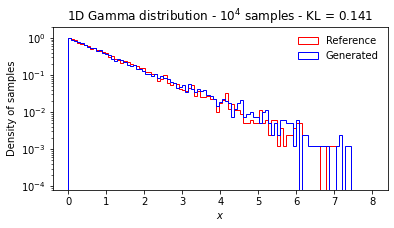

In [3]:
x_fake1 = np.loadtxt("fake_1dGAMMAdata_1_3_2_10000_10000_0.5")
x_real1 = np.loadtxt("real_1dGAMMAdata_1_3_2_10000_10000_0.5")
samples=10000
bins=100

plt.figure(figsize=(6,3))
plt.title('1D Gamma distribution - $10^4$ samples - KL = 0.141')
plt.ylabel('Density of samples')
plt.xlabel('$x$')
plt.hist((x_real1+1)*4, np.linspace(0.0, 8.0, bins), color='red', histtype='step', label='Reference', density=True)
plt.hist((x_fake1+1)*4, np.linspace(0.0, 8.0, bins), color='blue', histtype='step', label='Generated', density=True)
plt.legend(frameon=False)
plt.yscale('log')
plt.ylim([8*1e-5, 2])
plt.savefig("1Dgamma_distribution_10k.pdf", bbox_inches='tight')

## 100k samples

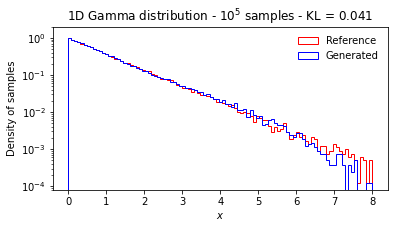

In [4]:
x_fake1 = np.loadtxt("fake_1dGAMMAdata_1_3_2_10000_100000_0.5")
x_real1 = np.loadtxt("real_1dGAMMAdata_1_3_2_10000_100000_0.5")
samples=100000
bins=100

plt.figure(figsize=(6,3))
plt.title('1D Gamma distribution - $10^5$ samples - KL = 0.041')
plt.ylabel('Density of samples')
plt.xlabel('$x$')
plt.hist((x_real1+1)*4, np.linspace(0.0, 8.0, bins), color='red', histtype='step', label='Reference', density=True)
plt.hist((x_fake1+1)*4, np.linspace(0.0, 8.0, bins), color='blue', histtype='step', label='Generated', density=True)
plt.legend(frameon=False)
plt.yscale('log')
plt.ylim([8*1e-5, 2])
plt.savefig("1Dgamma_distribution_100k.pdf", bbox_inches='tight')

# 3D correlated gaussian distribution

## 10k samples

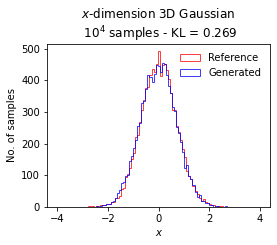

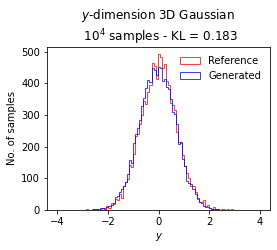

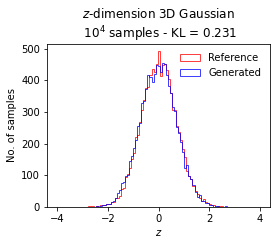

In [5]:
x_fake1 = np.loadtxt("fake1_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_real1 = np.loadtxt("real1_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_fake2 = np.loadtxt("fake2_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_real2 = np.loadtxt("real2_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_fake3 = np.loadtxt("fake3_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_real3 = np.loadtxt("real3_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
samples=10000
bins=100

plt.figure(figsize=(4,3))
plt.title('$x$-dimension 3D Gaussian \n $10^4$ samples - KL = 0.269')
plt.ylabel('No. of samples')
plt.xlabel('$x$')
plt.hist(x_real1*4, np.linspace(-4.0, 4.0, bins), color='red', histtype='step', label='Reference', alpha=0.75)
plt.hist(np.array(x_fake1*4), np.linspace(-4.0, 4.0, bins), color='blue', histtype='step', label='Generated', alpha=0.75)
plt.legend(frameon=False)
plt.savefig(f"1-distribution_3dgaussian_10k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$y$-dimension 3D Gaussian \n $10^4$ samples - KL = 0.183')
plt.ylabel('No. of samples')
plt.xlabel('$y$')
plt.hist(x_real2*4, np.linspace(-4.0, 4.0, bins), color='red', histtype='step', label='Reference', alpha=0.75)
plt.hist(np.array(x_fake2*4), np.linspace(-4.0, 4.0, bins), color='blue', histtype='step', label='Generated', alpha=0.75)
plt.legend(frameon=False)
plt.savefig(f"2-distribution_3dgaussian_10k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$z$-dimension 3D Gaussian \n $10^4$ samples - KL = 0.231')
plt.ylabel('No. of samples')
plt.xlabel('$z$')
plt.hist(x_real1*4, np.linspace(-4.0, 4.0, bins), color='red', histtype='step', label='Reference', alpha=0.75)
plt.hist(np.array(x_fake1*4), np.linspace(-4.0, 4.0, bins), color='blue', histtype='step', label='Generated', alpha=0.75)
plt.legend(frameon=False)
plt.savefig(f"3-distribution_3dgaussian_10k.pdf", bbox_inches='tight')

### Real 2d projections

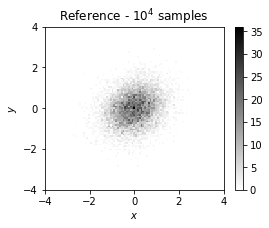

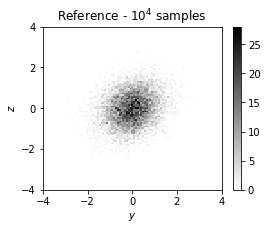

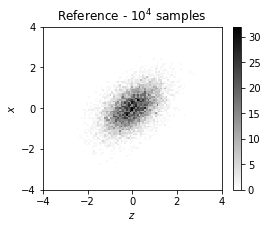

In [6]:
plt.figure(figsize=(4,3))
plt.title('Reference - $10^4$ samples')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.hist2d(x_real1*4, x_real2*4, np.linspace(-4.0, 4.0, bins), linewidths=0, rasterized=True, cmap="binary")
plt.yticks([-4,-2,0,2,4])
plt.colorbar()
plt.savefig(f"1-2_REAL_10k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('Reference - $10^4$ samples')
plt.ylabel('$z$')
plt.xlabel('$y$')
plt.hist2d(x_real2*4, x_real3*4, np.linspace(-4.0, 4.0, bins), linewidths=0, rasterized=True, cmap="binary")
plt.yticks([-4,-2,0,2,4])
cbar = plt.colorbar()
plt.savefig(f"2-3_REAL_10k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('Reference - $10^4$ samples')
plt.ylabel('$x$')
plt.xlabel('$z$')
plt.hist2d(x_real3*4, x_real1*4, np.linspace(-4.0, 4.0, bins), linewidths=0, rasterized=True, cmap="binary")
plt.yticks([-4,-2,0,2,4])
cbar = plt.colorbar()
plt.savefig(f"3-1_REAL_10k.pdf", bbox_inches='tight')

### Fake 2d projections 

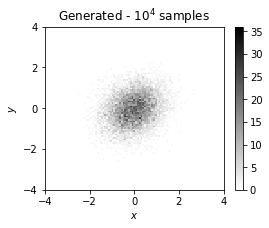

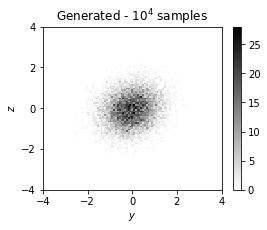

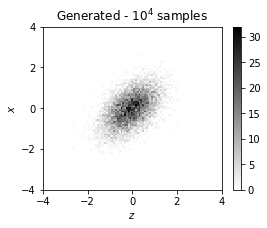

In [7]:
H, xedges, yedges = np.histogram2d(x_real1*4, x_real2*4, np.linspace(-4.0, 4.0, bins))
plt.figure(figsize=(4,3))
plt.title('Generated - $10^4$ samples')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.hist2d(x_fake1*4, x_fake2*4, np.linspace(-4.0, 4.0, bins), vmax=max(H.flatten()), linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"1-2_FAKE_10k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real2*4, x_real3*4, np.linspace(-4.0, 4.0, bins))
plt.figure(figsize=(4,3))
plt.title('Generated - $10^4$ samples')
plt.ylabel('$z$')
plt.xlabel('$y$')
plt.hist2d(x_fake2*4, x_fake3*4, np.linspace(-4.0, 4.0, bins), vmax=max(H.flatten()), linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"2-3_FAKE_10k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3*4, x_real1*4, np.linspace(-4.0, 4.0, bins))
plt.figure(figsize=(4,3))
plt.title('Generated - $10^4$ samples')
plt.ylabel('$x$')
plt.xlabel('$z$')
plt.hist2d(x_fake3*4, x_fake1*4, np.linspace(-4.0, 4.0, bins), vmax=max(H.flatten()), linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"3-1_FAKE_10k.pdf", bbox_inches='tight')

### Ratio Real/Fake

In [9]:
def do_ratio(a, b):
    ratio = np.ones(a.shape)
    for i in range(len(a.flatten())):
        if b.flatten()[i] == 0:
            ratio.flat[i] = np.nan
        elif a.flatten()[i] == 0:
            ratio.flat[i] = np.nan
        else:            
            ratio.flat[i] = a.flatten()[i]/b.flatten()[i]
    return ratio

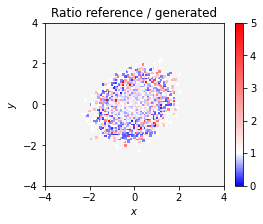

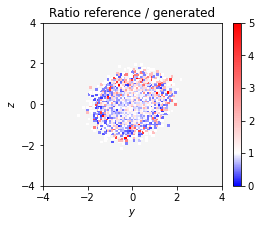

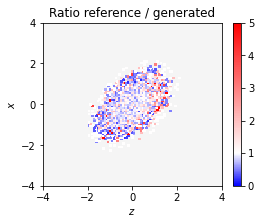

In [9]:
H_real, xedges, yedges = np.histogram2d(x_real1*4, x_real2*4, np.linspace(-4.0, 4.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake1*4, x_fake2*4, np.linspace(-4.0, 4.0, bins))
ratio = do_ratio(H_real, H_fake)

from matplotlib.colors import TwoSlopeNorm
divnorm=TwoSlopeNorm(vmin=0, vcenter=1, vmax=5)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"1-2_RATIO_10k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real2*4, x_real3*4, np.linspace(-4.0, 4.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake2*4, x_fake3*4, np.linspace(-4.0, 4.0, bins))
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$z$')
plt.xlabel('$y$')
plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"2-3_RATIO_10k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real3*4, x_real1*4, np.linspace(-4.0, 4.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake3*4, x_fake1*4, np.linspace(-4.0, 4.0, bins))
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$x$')
plt.xlabel('$z$')
plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"3-1_RATIO_10k.pdf", bbox_inches='tight')

## 100k samples

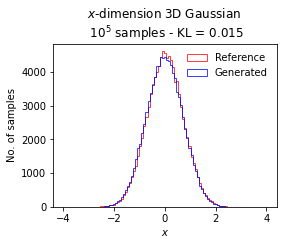

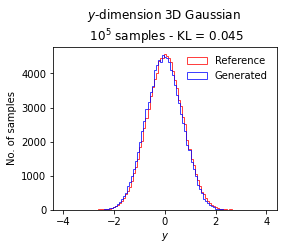

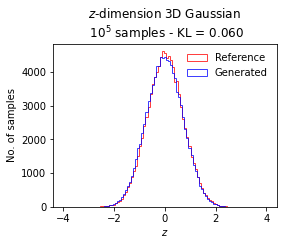

In [2]:
x_fake1 = np.loadtxt("fake1_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_real1 = np.loadtxt("real1_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_fake2 = np.loadtxt("fake2_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_real2 = np.loadtxt("real2_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_fake3 = np.loadtxt("fake3_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_real3 = np.loadtxt("real3_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
samples=100000
bins=100

plt.figure(figsize=(4,3))
plt.title('$x$-dimension 3D Gaussian \n $10^5$ samples - KL = 0.015')
plt.ylabel('No. of samples')
plt.xlabel('$x$')
plt.hist(x_real1*4, np.linspace(-4.0, 4.0, bins), color='red', histtype='step', label='Reference', alpha=0.75)
plt.hist(np.array(x_fake1*4), np.linspace(-4.0, 4.0, bins), color='blue', histtype='step', label='Generated', alpha=0.75)
plt.legend(frameon=False)
plt.savefig(f"1-distribution_3dgaussian_100k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$y$-dimension 3D Gaussian \n $10^5$ samples - KL = 0.045')
plt.ylabel('No. of samples')
plt.xlabel('$y$')
plt.hist(x_real2*4, np.linspace(-4.0, 4.0, bins), color='red', histtype='step', label='Reference', alpha=0.75)
plt.hist(np.array(x_fake2*4), np.linspace(-4.0, 4.0, bins), color='blue', histtype='step', label='Generated', alpha=0.75)
plt.legend(frameon=False)
plt.savefig(f"2-distribution_3dgaussian_100k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$z$-dimension 3D Gaussian \n $10^5$ samples - KL = 0.060')
plt.ylabel('No. of samples')
plt.xlabel('$z$')
plt.hist(x_real1*4, np.linspace(-4.0, 4.0, bins), color='red', histtype='step', label='Reference', alpha=0.75)
plt.hist(np.array(x_fake1*4), np.linspace(-4.0, 4.0, bins), color='blue', histtype='step', label='Generated', alpha=0.75)
plt.legend(frameon=False)
plt.savefig(f"3-distribution_3dgaussian_100k.pdf", bbox_inches='tight')

### Real 2d projections

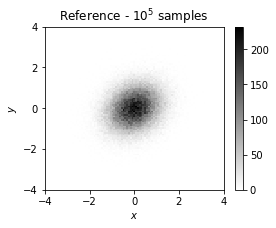

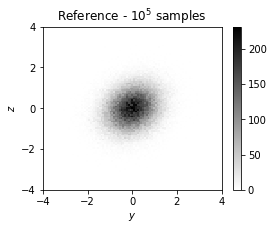

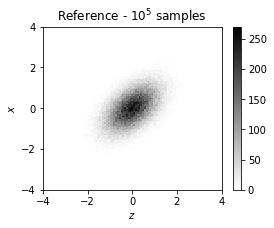

In [11]:
plt.figure(figsize=(4,3))
plt.title('Reference - $10^5$ samples')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.hist2d(x_real1*4, x_real2*4, np.linspace(-4.0, 4.0, bins), linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"1-2_REAL_100k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('Reference - $10^5$ samples')
plt.ylabel('$z$')
plt.xlabel('$y$')
plt.hist2d(x_real2*4, x_real3*4, np.linspace(-4.0, 4.0, bins), linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"2-3_REAL_100k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('Reference - $10^5$ samples')
plt.ylabel('$x$')
plt.xlabel('$z$')
plt.hist2d(x_real3*4, x_real1*4, np.linspace(-4.0, 4.0, bins), linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"3-1_REAL_100k.pdf", bbox_inches='tight')

### Fake 2d projections

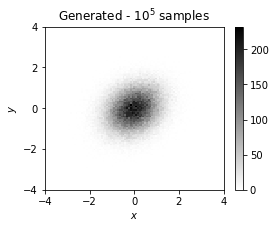

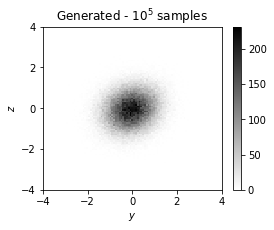

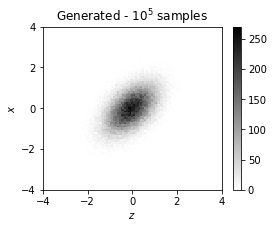

In [12]:
H, xedges, yedges = np.histogram2d(x_real1*4, x_real2*4, np.linspace(-4.0, 4.0, bins))
plt.figure(figsize=(4,3))
plt.title('Generated - $10^5$ samples')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.hist2d(x_fake1*4, x_fake2*4, np.linspace(-4.0, 4.0, bins), vmax=max(H.flatten()), linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"1-2_FAKE_100k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real2*4, x_real3*4, np.linspace(-4.0, 4.0, bins))
plt.figure(figsize=(4,3))
plt.title('Generated - $10^5$ samples')
plt.ylabel('$z$')
plt.xlabel('$y$')
plt.hist2d(x_fake2*4, x_fake3*4, np.linspace(-4.0, 4.0, bins), vmax=max(H.flatten()), linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"2-3_FAKE_100k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3*4, x_real1*4, np.linspace(-4.0, 4.0, bins))
plt.figure(figsize=(4,3))
plt.title('Generated - $10^5$ samples')
plt.ylabel('$x$')
plt.xlabel('$z$')
plt.hist2d(x_fake3*4, x_fake1*4, np.linspace(-4.0, 4.0, bins), vmax=max(H.flatten()), linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"3-1_FAKE_100k.pdf", bbox_inches='tight')

### Ratio Real/Fake

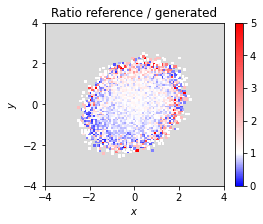

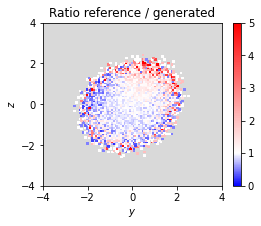

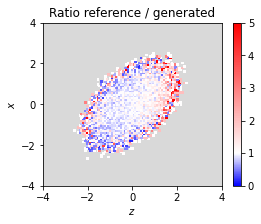

In [10]:
H_real, xedges, yedges = np.histogram2d(x_real1*4, x_real2*4, np.linspace(-4.0, 4.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake1*4, x_fake2*4, np.linspace(-4.0, 4.0, bins))
ratio = do_ratio(H_real, H_fake)

from matplotlib.colors import TwoSlopeNorm
divnorm=TwoSlopeNorm(vmin=0, vcenter=1, vmax=5)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('0.85')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"1-2_RATIO_100k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real2*4, x_real3*4, np.linspace(-4.0, 4.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake2*4, x_fake3*4, np.linspace(-4.0, 4.0, bins))
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('0.85')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$z$')
plt.xlabel('$y$')
plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"2-3_RATIO_100k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real3*4, x_real1*4, np.linspace(-4.0, 4.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake3*4, x_fake1*4, np.linspace(-4.0, 4.0, bins))
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('0.85')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$x$')
plt.xlabel('$z$')
plt.colorbar()
plt.yticks([-4,-2,0,2,4])
plt.savefig(f"3-1_RATIO_100k.pdf", bbox_inches='tight')

# LHC data (SIMULATED)

## 10k samples

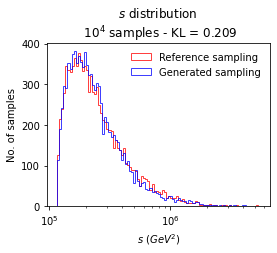

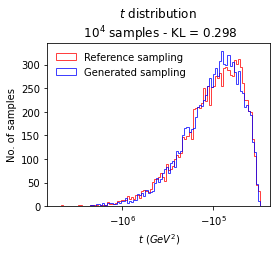

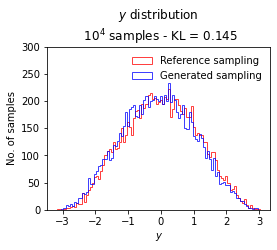

In [14]:
x_fake1 = np.loadtxt("fake1_LHCdata_3_5_4_10000_10000_0.5")
x_real1 = np.loadtxt("real1_LHCdata_3_5_4_10000_10000_0.5")
x_fake2 = np.loadtxt("fake2_LHCdata_3_5_4_10000_10000_0.5")
x_real2 = np.loadtxt("real2_LHCdata_3_5_4_10000_10000_0.5")
x_fake3 = np.loadtxt("fake3_LHCdata_3_5_4_10000_10000_0.5")
x_real3 = np.loadtxt("real3_LHCdata_3_5_4_10000_10000_0.5")
samples=10000
bins=100

plt.figure(figsize=(4,3))
plt.title('$s$ distribution \n $10^4$ samples - KL = 0.209')
plt.ylabel('No. of samples')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist(x_real1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.xscale('log')
plt.savefig(f"s-distribution_LHCdata_10k.pdf", bbox_inches='tight')

x_real2 = -1*np.array(x_real2)
x_fake2 = -1*np.array(x_fake2)    
plt.figure(figsize=(4,3))
plt.title('$t$ distribution \n $10^4$ samples - KL = 0.298')
plt.ylabel('No. of samples')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist(-1*x_real2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(-1*x_fake2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.xscale('symlog')
plt.legend(frameon=False, loc=2)
plt.savefig(f"t-distribution_LHCdata_10k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$y$ distribution \n $10^4$ samples - KL = 0.145')
plt.ylabel('No. of samples')
plt.xlabel('$y$')
plt.hist(x_real3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.ylim(0,300)
plt.savefig(f"y-distribution_LHCdata_10k.pdf", bbox_inches='tight')

### 2d real projections

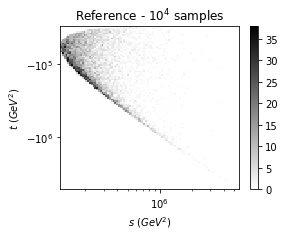

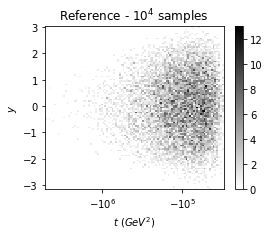

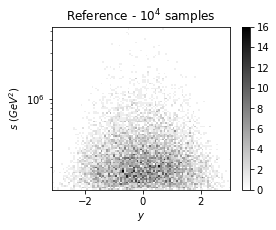

In [15]:
plt.figure(figsize=(4,3))
plt.title('Reference - $10^4$ samples')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),
                                 -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)], 
           linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_REAL_10k.pdf", bbox_inches='tight')
save = plt.figure

plt.figure(figsize=(4,3))
plt.title('Reference - $10^4$ samples')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)], color='red', label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_REAL_10k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('Reference - $10^4$ samples')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.hist2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)], color='red', label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_REAL_10k.pdf", bbox_inches='tight')

### 2d fake projections

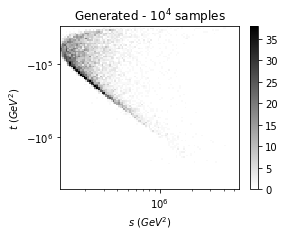

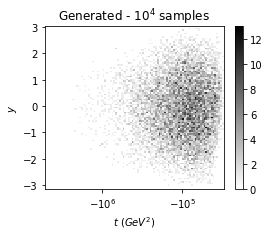

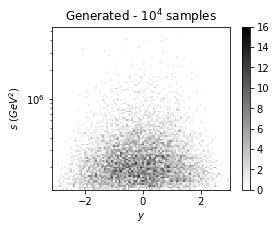

In [16]:
H, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^4$ samples')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_FAKE_10k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^4$ samples')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_FAKE_10k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^4$ samples')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.hist2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_FAKE_10k.pdf", bbox_inches='tight')

## Ratio Real/Fake

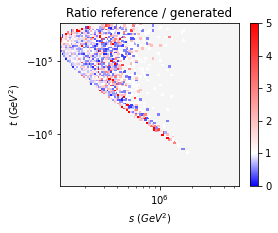

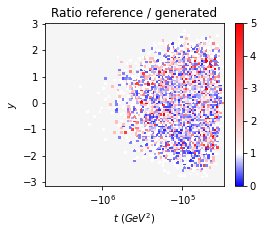

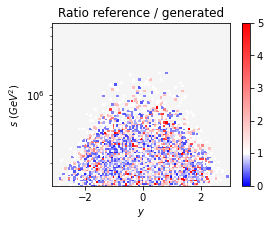

In [17]:
H_real, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
ratio = do_ratio(H_real, H_fake)

from matplotlib.colors import TwoSlopeNorm
divnorm=TwoSlopeNorm(vmin=0, vcenter=1, vmax=5)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.title('Ratio reference / generated')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.savefig(f"s-t_RATIO_10k.pdf", bbox_inches='tight')


H_real, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
H_fake, xedges, yedges = np.histogram2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
ratio = do_ratio(H_real, H_fake)


plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.colorbar()
plt.xscale('symlog')
plt.title('Ratio reference / generated')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.savefig(f"t-y_RATIO_10k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.colorbar()
plt.title('Ratio reference / generated')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.yscale('log')
plt.savefig(f"y-s_RATIO_10k.pdf", bbox_inches='tight')

## 100k samples

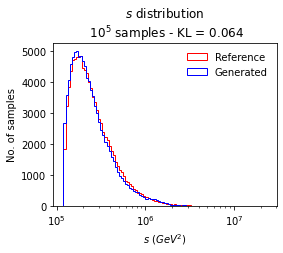

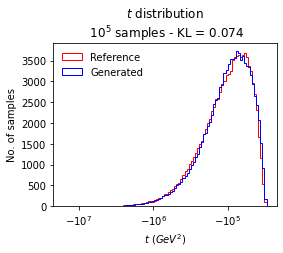

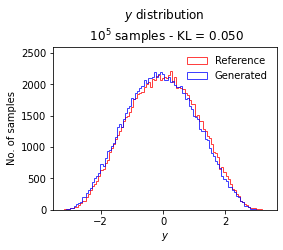

In [11]:
x_fake1 = np.loadtxt("fake1_LHCdata_3_5_4_10000_100000_0.5")
x_real1 = np.loadtxt("real1_LHCdata_3_5_4_10000_100000_0.5")
x_fake2 = np.loadtxt("fake2_LHCdata_3_5_4_10000_100000_0.5")
x_real2 = np.loadtxt("real2_LHCdata_3_5_4_10000_100000_0.5")
x_fake3 = np.loadtxt("fake3_LHCdata_3_5_4_10000_100000_0.5")
x_real3 = np.loadtxt("real3_LHCdata_3_5_4_10000_100000_0.5")
samples=100000
bins=100

plt.figure(figsize=(4,3))
plt.title('$s$ distribution \n $10^5$ samples - KL = 0.064')
plt.ylabel('No. of samples')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist(x_real1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='red', label='Reference')
plt.hist(x_fake1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='blue', label='Generated')
plt.legend(frameon=False)
plt.xscale('log')
plt.savefig(f"s-distribution_LHCdata_100k.pdf", bbox_inches='tight')

x_real2 = -1*np.array(x_real2)
x_fake2 = -1*np.array(x_fake2)
plt.figure(figsize=(4,3))
plt.title('$t$ distribution \n $10^5$ samples - KL = 0.074')
plt.ylabel('No. of samples')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist(-1*x_real2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='red', label='Reference')
plt.hist(-1*x_fake2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='blue', label='Generated')
plt.xscale('symlog')
plt.legend(frameon=False, loc=2)
plt.savefig(f"t-distribution_LHCdata_100k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$y$ distribution \n $10^5$ samples - KL = 0.050')
plt.ylabel('No. of samples')
plt.xlabel('$y$')
plt.hist(x_real3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='red', label='Reference', alpha=0.75)
plt.hist(x_fake3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='blue', label='Generated', alpha=0.75)
plt.legend(frameon=False)
plt.ylim(0,2600)
plt.savefig(f"y-distribution_LHCdata_100k.pdf", bbox_inches='tight')

### Real 2d projections

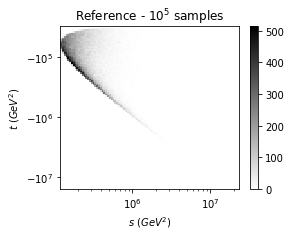

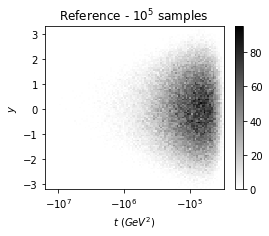

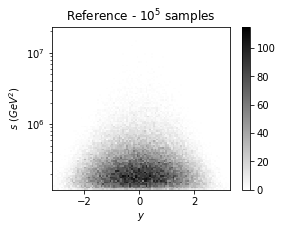

In [19]:
plt.figure(figsize=(4,3))
plt.title('Reference - $10^5$ samples')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),
                                 -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)], 
           linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_REAL_100k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('Reference - $10^5$ samples')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)], color='red', label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_REAL_100k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('Reference - $10^5$ samples')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.hist2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)], color='red', label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_REAL_100k.pdf", bbox_inches='tight')

### Fake 2d projections

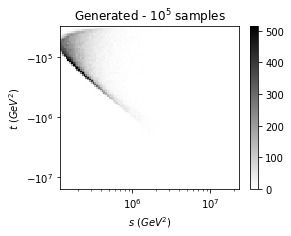

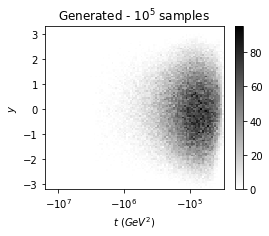

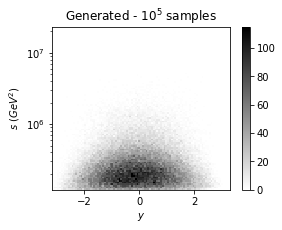

In [20]:
H, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^5$ samples')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_FAKE_100k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^5$ samples')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_FAKE_100k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^5$ samples')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.hist2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_FAKE_100k.pdf", bbox_inches='tight')

## Ratio Real/Fake

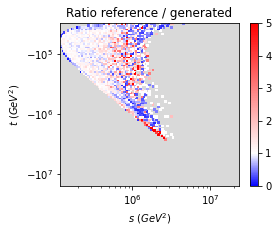

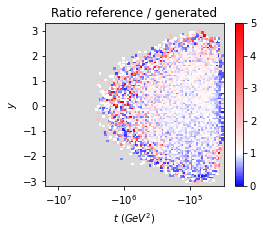

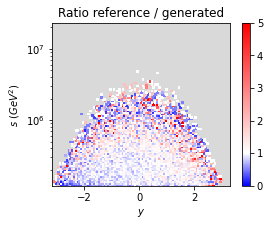

In [12]:
H_real, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
ratio = do_ratio(H_real, H_fake)

from matplotlib.colors import TwoSlopeNorm
divnorm=TwoSlopeNorm(vmin=0, vcenter=1, vmax=5)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('0.85')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_RATIO_100k.pdf", bbox_inches='tight')


H_real, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
H_fake, xedges, yedges = np.histogram2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('0.85')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_RATIO_100k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('0.85')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_RATIO_100k.pdf", bbox_inches='tight')

# LHC data (EXPERIMENTAL)

## IBM - 10k samples

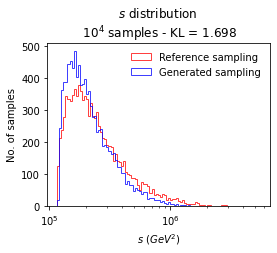

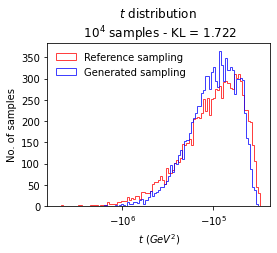

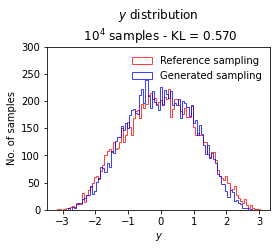

In [3]:
x_fake1 = np.loadtxt("fake1_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")
x_fake2 = np.loadtxt("fake2_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")
x_fake3 = np.loadtxt("fake3_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")
x_real1 = np.loadtxt("real1_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")
x_real2 = np.loadtxt("real2_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")
x_real3 = np.loadtxt("real3_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")
samples=10000
bins=100

plt.figure(figsize=(4,3))
plt.title('$s$ distribution \n $10^4$ samples - KL = 1.698')
plt.ylabel('No. of samples')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist(x_real1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.xscale('log')
plt.savefig(f"s-distribution_LHCdata_10k.pdf", bbox_inches='tight')

x_real2 = -1*np.array(x_real2)
x_fake2 = -1*np.array(x_fake2)  
plt.figure(figsize=(4,3))
plt.title('$t$ distribution \n $10^4$ samples - KL = 1.722')
plt.ylabel('No. of samples')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist(-1*x_real2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(-1*x_fake2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.xscale('symlog')
plt.legend(frameon=False, loc=2)
plt.savefig(f"t-distribution_LHCdata_10k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$y$ distribution \n $10^4$ samples - KL = 0.570')
plt.ylabel('No. of samples')
plt.xlabel('$y$')
plt.hist(x_real3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.ylim(0,300)
plt.savefig(f"y-distribution_LHCdata_10k.pdf", bbox_inches='tight')

### Real 2d projections

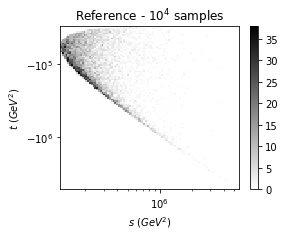

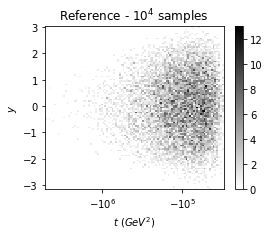

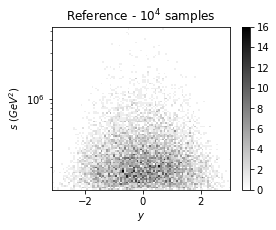

In [23]:
plt.figure(figsize=(4,3))
plt.title('Reference - $10^4$ samples')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),
                                 -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)], 
           linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_REAL_IBM_10k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('Reference - $10^4$ samples')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)], color='red', label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_REAL__IBM_10k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('Reference - $10^4$ samples')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.hist2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)], color='red', label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_REAL_IBM_10k.pdf", bbox_inches='tight')

### Fake 2d projections

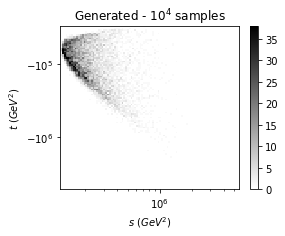

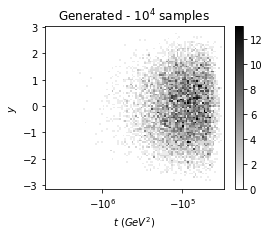

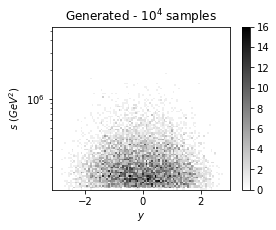

In [24]:
H, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^4$ samples')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_FAKE_IBM_10k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^4$ samples')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_FAKE_IBM_10k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^4$ samples')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.hist2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_FAKE_IBM_10k.pdf", bbox_inches='tight')

## Ratio Real/Fake

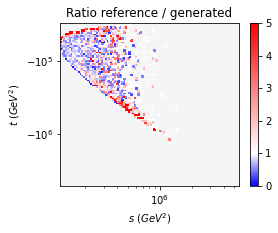

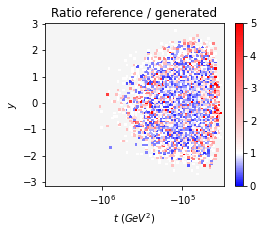

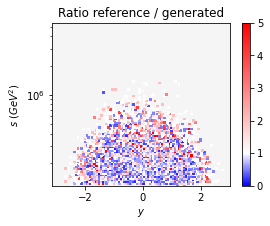

In [25]:
H_real, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
ratio = do_ratio(H_real, H_fake)

from matplotlib.colors import TwoSlopeNorm
divnorm=TwoSlopeNorm(vmin=0, vcenter=1, vmax=5)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.xscale('log')
plt.yscale('symlog')
plt.colorbar()
plt.savefig(f"s-t_RATIO_IBM_10k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
H_fake, xedges, yedges = np.histogram2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_RATIO_IBM_10k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_RATIO_IBM_10k.pdf", bbox_inches='tight')

## IBM Q - 100k samples

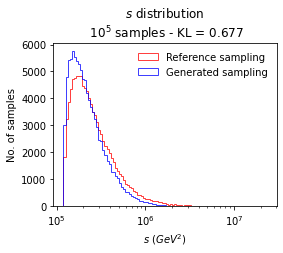

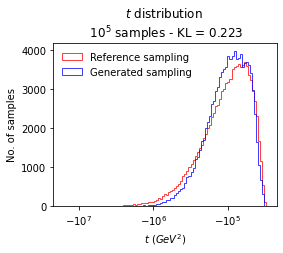

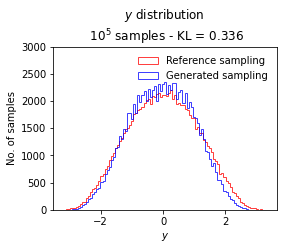

In [13]:
x_fake1 = np.loadtxt("fake1_LHCttbar_ibmq_santiago_3_5_2_10000_100000_0.5_1000")
x_fake2 = np.loadtxt("fake2_LHCttbar_ibmq_santiago_3_5_2_10000_100000_0.5_1000")
x_fake3 = np.loadtxt("fake3_LHCttbar_ibmq_santiago_3_5_2_10000_100000_0.5_1000")
x_real1 = np.loadtxt("real1_LHCdata_3_5_4_10000_100000_0.5")
x_real2 = np.loadtxt("real2_LHCdata_3_5_4_10000_100000_0.5")
x_real3 = np.loadtxt("real3_LHCdata_3_5_4_10000_100000_0.5")
samples=100000
bins=100


plt.figure(figsize=(4,3))
plt.title('$s$ distribution \n $10^5$ samples - KL = 0.677')
plt.ylabel('No. of samples')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist(x_real1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.xscale('log')
plt.savefig(f"s-distribution_IBM_LHCdata_100k.pdf", bbox_inches='tight')

x_real2 = -1*np.array(x_real2)
x_fake2 = -1*np.array(x_fake2)
plt.figure(figsize=(4,3))
plt.title('$t$ distribution \n $10^5$ samples - KL = 0.223')
plt.ylabel('No. of samples')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist(-1*x_real2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(-1*x_fake2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.xscale('symlog')
plt.legend(frameon=False, loc=2)
plt.savefig(f"t-distribution_IBM_LHCdata_100k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$y$ distribution \n $10^5$ samples - KL = 0.336')
plt.ylabel('No. of samples')
plt.xlabel('$y$')
plt.hist(x_real3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.ylim(0,3000)
plt.savefig(f"y-distribution_IBM_LHCdata_100k.pdf", bbox_inches='tight')

### Fake 2d projections

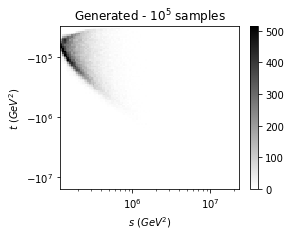

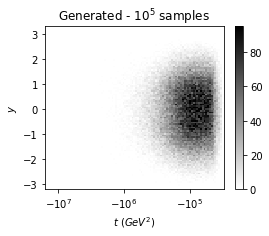

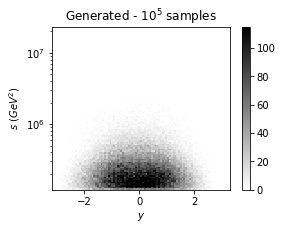

In [27]:
H, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^5$ samples')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_FAKE_IBM_100k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^5$ samples')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_FAKE_IBM_100k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^5$ samples')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.hist2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_FAKE_IBM_100k.pdf", bbox_inches='tight')

### Ratio real/fake

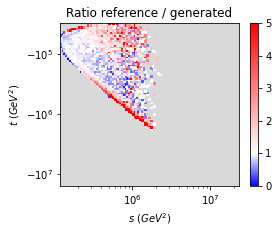

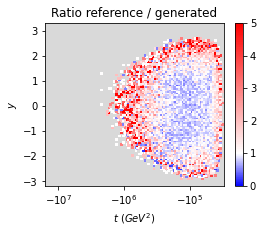

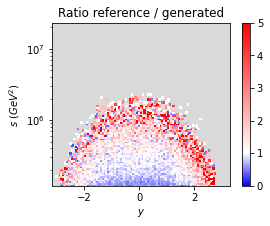

In [15]:
H_real, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
ratio = do_ratio(H_real, H_fake)

from matplotlib.colors import TwoSlopeNorm
divnorm=TwoSlopeNorm(vmin=0, vcenter=1, vmax=5)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('0.85')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.xscale('log')
plt.yscale('symlog')
plt.colorbar()
plt.savefig(f"s-t_RATIO_IBM_100k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
H_fake, xedges, yedges = np.histogram2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('0.85')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_RATIO_IBM_100k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('0.85')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_RATIO_IBM_100k.pdf", bbox_inches='tight')

## IBM Q - 1k samples

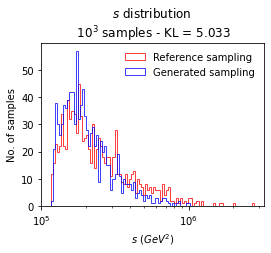

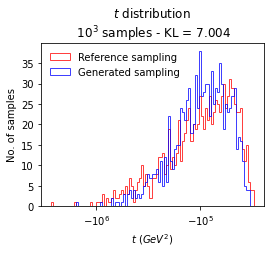

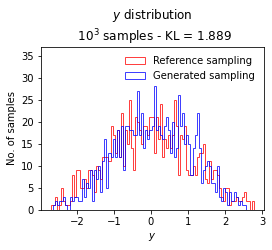

In [29]:
x_fake1 = np.loadtxt("fake1_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")[:1000]
x_fake2 = np.loadtxt("fake2_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")[:1000]
x_fake3 = np.loadtxt("fake3_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")[:1000]
x_real1 = np.loadtxt("real1_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")[:1000]
x_real2 = np.loadtxt("real2_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")[:1000]
x_real3 = np.loadtxt("real3_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")[:1000]
samples=1000
bins=100

plt.figure(figsize=(4,3))
plt.title('$s$ distribution \n $10^3$ samples - KL = 5.033')
plt.ylabel('No. of samples')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist(x_real1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.xscale('log')
plt.savefig(f"s-distribution_IBM_1k.pdf", bbox_inches='tight')

x_real2 = -1*np.array(x_real2)
x_fake2 = -1*np.array(x_fake2)
plt.figure(figsize=(4,3))
plt.title('$t$ distribution \n $10^3$ samples - KL = 7.004')
plt.ylabel('No. of samples')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist(-1*x_real2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(-1*x_fake2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.xscale('symlog')
plt.legend(frameon=False, loc=2)
plt.savefig(f"t-distribution_IBM_1k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$y$ distribution \n $10^3$ samples - KL = 1.889')
plt.ylabel('No. of samples')
plt.xlabel('$y$')
plt.hist(x_real3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.ylim(0,37)
plt.savefig(f"y-distribution_IBM_1k.pdf", bbox_inches='tight')

## Fake 2d projections

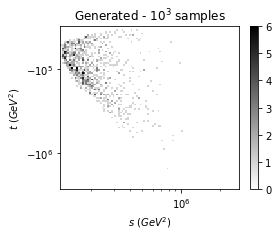

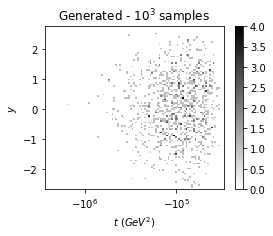

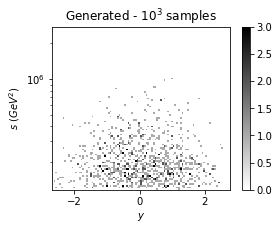

In [30]:
H, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^3$ samples')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_FAKE_IBM_1k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^3$ samples')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_FAKE_IBM_1k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^3$ samples')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.hist2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_FAKE_IBM_1k.pdf", bbox_inches='tight')

## Ratio real/fake

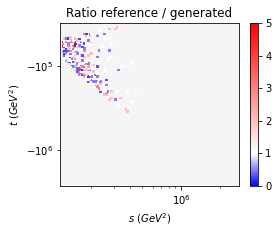

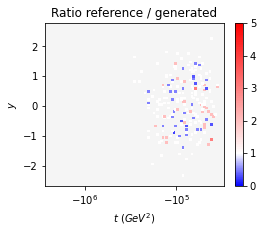

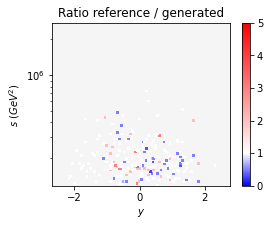

In [31]:
H_real, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
ratio = do_ratio(H_real, H_fake)

from matplotlib.colors import TwoSlopeNorm
divnorm=TwoSlopeNorm(vmin=0, vcenter=1, vmax=5)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.xscale('log')
plt.yscale('symlog')
plt.colorbar()
plt.savefig(f"s-t_RATIO_IBM_1k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
H_fake, xedges, yedges = np.histogram2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_RATIO_IBM_1k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_RATIO_IBM_1k.pdf", bbox_inches='tight')

## Ion Q - 1k samples

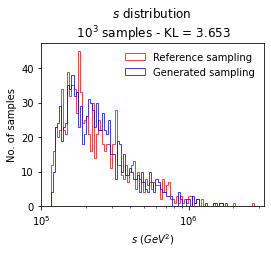

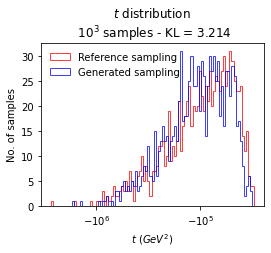

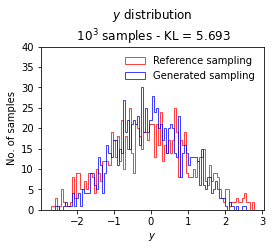

In [32]:
x_fake1 = np.loadtxt("out_aws_generator_samples.txt").T[0]
x_fake2 = np.loadtxt("out_aws_generator_samples.txt").T[1]
x_fake3 = np.loadtxt("out_aws_generator_samples.txt").T[2]
x_real1 = np.loadtxt("real1_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")[:1000]
x_real2 = np.loadtxt("real2_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")[:1000]
x_real3 = np.loadtxt("real3_LHCttbar_ibmq_santiago_3_5_2_10000_10000_0.5_1000")[:1000]
samples=1000
bins=100  


plt.figure(figsize=(4,3))
plt.title('$s$ distribution \n $10^3$ samples - KL = 3.653')
plt.ylabel('No. of samples')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist(x_real1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake1, np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.xscale('log')
plt.savefig(f"s-distribution_LHCdata_ionQ_1k.pdf", bbox_inches='tight')

x_real2 = -1*np.array(x_real2)
x_fake2 = -1*np.array(x_fake2) 
plt.figure(figsize=(4,3))
plt.title('$t$ distribution \n $10^3$ samples - KL = 3.214')
plt.ylabel('No. of samples')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist(-1*x_real2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(-1*x_fake2, -1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.xscale('symlog')
plt.legend(frameon=False, loc=2)
plt.savefig(f"t-distribution_LHCdata_ionQ_1k.pdf", bbox_inches='tight')

plt.figure(figsize=(4,3))
plt.title('$y$ distribution \n $10^3$ samples - KL = 5.693')
plt.ylabel('No. of samples')
plt.xlabel('$y$')
plt.hist(x_real3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='red', label='Reference sampling', alpha=0.75)
plt.hist(x_fake3, np.linspace(min(x_real3),max(x_real3),bins), histtype='step', color='blue', label='Generated sampling', alpha=0.75)
plt.legend(frameon=False)
plt.ylim(0,40)
plt.savefig(f"y-distribution_LHCdata_ionQ_1k.pdf", bbox_inches='tight')

## Fake 2d projections

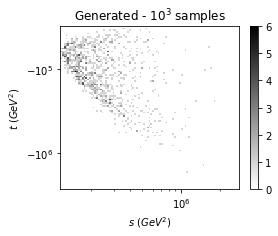

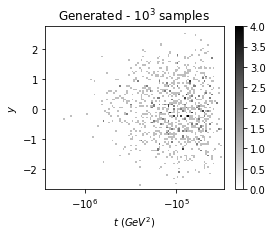

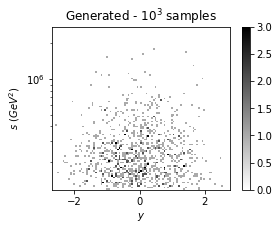

In [33]:
H, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^3$ samples')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.hist2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('log')
plt.yscale('symlog')
plt.savefig(f"s-t_FAKE_ionQ_1k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^3$ samples')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.hist2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_FAKE_ionQ_1k.pdf", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
plt.figure(figsize=(4,3))
plt.title('Generated - $10^3$ samples')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.hist2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)], color='red', vmax=max(H.flatten()), label='real', alpha=1.0, linewidths=0, rasterized=True, cmap="binary")
cbar = plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_FAKE_ionQ_1k.pdf", bbox_inches='tight')

## Ratio real/fake

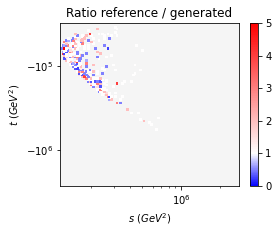

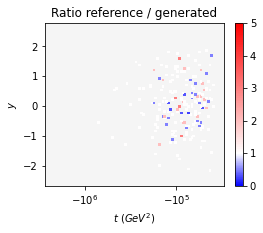

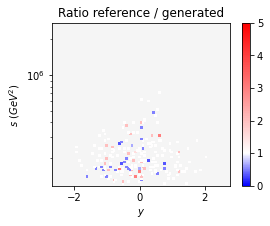

In [34]:
H_real, xedges, yedges = np.histogram2d(x_real1, -1*x_real2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake1, -1*x_fake2, [np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins),-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins)])    
ratio = do_ratio(H_real, H_fake)

from matplotlib.colors import TwoSlopeNorm
divnorm=TwoSlopeNorm(vmin=0, vcenter=1, vmax=5)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$t$ $(GeV^2)$')
plt.xlabel('$s$ $(GeV^2)$')
plt.xscale('log')
plt.yscale('symlog')
plt.colorbar()
plt.savefig(f"s-t_RATIO_ionQ_1k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(-1*x_real2, x_real3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
H_fake, xedges, yedges = np.histogram2d(-1*x_fake2, x_fake3, [-1*np.logspace(np.log10(max(x_real2)),np.log10(min(x_real2)),bins),np.linspace(min(x_real3),max(x_real3),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$y$')
plt.xlabel('$t$ $(GeV^2)$')
plt.colorbar()
plt.xscale('symlog')
plt.savefig(f"t-y_RATIO_ionQ_1k.pdf", bbox_inches='tight')

H_real, xedges, yedges = np.histogram2d(x_real3, x_real1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
H_fake, xedges, yedges = np.histogram2d(x_fake3, x_fake1, [np.linspace(min(x_real3),max(x_real3),bins),np.logspace(np.log10(min(x_real1)),np.log10(max(x_real1)),bins)])    
ratio = do_ratio(H_real, H_fake)

plt.figure(figsize=(4,3))
plt.axes().set_facecolor('whitesmoke')
plt.pcolor(xedges, yedges, ratio.T, cmap='bwr', norm=divnorm)
plt.title('Ratio reference / generated')
plt.ylabel('$s$ $(GeV^2)$')
plt.xlabel('$y$')
plt.colorbar()
plt.yscale('log')
plt.savefig(f"y-s_RATIO_ionQ_1k.pdf", bbox_inches='tight')